# 1. Define paths

In [4]:
from google.colab import drive
drive.mount("/my-drive/", force_remount = True)

Mounted at /my-drive/


In [5]:
import os
import pandas as pd

In [6]:
PATH_ROOT = "/my-drive/MyDrive/ep_data"
DATASET_PATH = os.path.join(PATH_ROOT, "dataset")
PATH_DATASET_AUG = os.path.join(PATH_ROOT, "dataset_augmented")

# 2. Builds csv for original dataset

In [7]:
def parse_light(light):
  parsed_light = ""
  if light[0] == "d":
    parsed_light = "dia-"
  else:
    parsed_light = "noite-"
  parsed_light += "-"
  if light[1] == "e":
    parsed_light += "exterior"


def parse_img_columns(img_name):
  parsed_img_name = img_name.split(".")[0]
  try:
    obj, nobj, pos, light, bg = parsed_img_name.split("_")[0:5]
    nobj = int(nobj[3])
    pos = int(pos[1])
    bg = int(bg[1])
    if light[0] == "d":
      parsed_light = "dia"
    else:
      parsed_light = "noite"
    if light[1] == "e":
      amb = "exterior"
    else:
      amb = "interior"
    dict_col = {"Objeto": obj,
                "Nobjeto": nobj,
                "Posicao": pos,
                "Iluminacao": parsed_light,
                "Ambiente": amb,
                "Fundo": bg,
                "Nome": img_name}
  except Exception as e :
    print("Error in parsing image!")
    print(f"Image name: {img_name}")
    print(e)
  return(dict_col)

In [8]:
df_list = []
for dirpath, dirname, filename in os.walk(DATASET_PATH):
  if dirpath != DATASET_PATH + "/":
    for file in filename:
      if file.split(".")[1] in ["jpg", "png", "jpeg"]:
        df_list.append(parse_img_columns(file))

df = pd.DataFrame(df_list)

In [9]:
df.head

<bound method NDFrame.head of        Objeto  Nobjeto  Posicao Iluminacao  Ambiente  Fundo  \
0     celular        1        1        dia  exterior      2   
1     celular        1        1        dia  interior      2   
2     celular        1        1        dia  exterior      1   
3     celular        1        1        dia  exterior      3   
4     celular        1        1      noite  interior      3   
...       ...      ...      ...        ...       ...    ...   
1435    prato        3        2      noite  exterior      3   
1436    prato        3        3      noite  exterior      3   
1437    prato        4        1      noite  exterior      3   
1438    prato        4        2      noite  exterior      3   
1439    prato        4        3      noite  exterior      3   

                           Nome  
0     celular_obj1_p1_de_f2.png  
1     celular_obj1_p1_di_f2.png  
2     celular_obj1_p1_de_f1.png  
3     celular_obj1_p1_de_f3.png  
4     celular_obj1_p1_ni_f3.png  
...      

In [10]:
save_path = os.path.join(PATH_ROOT, "dataset.csv")
df.to_csv(save_path, index=False)

# 3. Creates csv for augmented dataset

In [11]:
def parse_light(light):
  parsed_light = ""
  if light[0] == "d":
    parsed_light = "dia-"
  else:
    parsed_light = "noite-"
  parsed_light += "-"
  if light[1] == "e":
    parsed_light += "exterior"


def parse_augmented_img_columns(img_name):
  parsed_img_name = img_name.split(".")[0]
  try:
    obj, nobj, pos, light, bg, transf = parsed_img_name.split("_")[0:6]
    nobj = int(nobj[3])
    pos = int(pos[1])
    bg = int(bg[1])
    if light[0] == "d":
      parsed_light = "dia"
    else:
      parsed_light = "noite"
    if light[1] == "e":
      amb = "exterior"
    else:
      amb = "interior"
    dict_col = {"Objeto": obj,
                "Nobjeto": nobj,
                "Posicao": pos,
                "Iluminacao": parsed_light,
                "Ambiente": amb,
                "Fundo": bg,
                "Trasnformacao": transf,
                "Nome": img_name}
  except Exception as e :
    print("Error in parsing image!")
    print(f"Image name: {img_name}")
    print(e)
  return(dict_col)

In [12]:
import imageio

In [ ]:
df_list = []
for dirpath, dirname, filename in os.walk(PATH_DATASET_AUG):
  if dirpath != PATH_DATASET_AUG + "/":
    for file in filename:
      if file.split(".")[1] in ["jpg", "png", "jpeg"]:
        row_dict = parse_augmented_img_columns(file)
        row_dict["Image"] = [imageio.imread(os.path.join(dirpath, file))]
        df_list.append(row_dict)

print(df_list[:10])
df = pd.DataFrame(df_list)

In [ ]:
from matplotlib import pyplot as plt

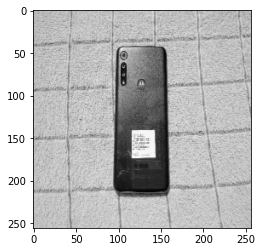

In [ ]:
plt.imshow(df.Image[0][0], cmap = "gray")

In [ ]:
save_path = os.path.join(PATH_ROOT, "dataset_augmented.csv")
df.to_csv(save_path, index=False)